In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import word_tokenize  

In [3]:
!pip install -U spacy

In [4]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.8 MB 1.8 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [5]:
import spacy

In [6]:
manual_dataset = pd.read_csv("manual_dataset.csv", index_col=0)
manual_dataset

,Real/ Fake,News Source,Link,Date,Topic/ Keyword (if applicable),Title,Text
#,,,,,,,
0,Real,The Globe and Mail,https://www.theglobeandmail.com/business/comme...,2/19/2024,Renewable energy,"With Alberta renewables ban, business common s...","Investment creates jobs, expands tax revenue, ..."
1,Real,CBC News,https://www.cbc.ca/news/canada/calgary/oil-ind...,2/22/24,Oil,Some sectors of oil industry 'dragging their h...,Prime Minister Justin Trudeau and Alberta Prem...
2,Real,CBC News,https://www.cbc.ca/news/canada/thunder-bay/cat...,03/04/24,Mining,"Demanding a proper say, Cat Lake First Nation'...",Cat Lake First Nation has been granted an inju...
3,Real,CBC News,https://www.cbc.ca/news/politics/guilbeault-no...,02/14/24,Climate,Feds will stop investing in 'large' road proje...,Environment Minister Steven Guilbeault said Mo...
4,Real,Global News,https://globalnews.ca/news/10292216/climate-ch...,02/13/2024,Climate,Floods and fires: Climate change brings health...,Communities across British Columbia needs to p...
5,Real,CBC News,https://www.cbc.ca/news/canada/toronto/ontario...,02/08/24,Climate,New mineral processing plants touted as 'missi...,A Canadian mining company will announce plans ...
6,Real,Financial Post,https://financialpost.com/pmn/business-pmn/inf...,03/04/24,Climate,Infernos Rage From Texas to Australia as Fire ...,(Bloomberg) — After a year of deadly wildfires...
7,Real,CBC News,https://www.cbc.ca/news/canada/saskatchewan/sa...,03/05/24,Climate,Sask. farmer 'breathing a sigh of relief' afte...,A Saskatchewan farmer says she is thrilled wit...
8,Real,CBC News,https://www.cbc.ca/news/canada/british-columbi...,03/03/24,Wildfire,Inaccurate government data may be stoking wild...,Wildfire fighting and forest management decisi...


In [8]:
def remove_news_agency_name(text):
    return re.sub(r"Reuters|AP|New York Times|Washington Post|Business Insider|Atlantic|Fox News|National Review|Talking Points Memo|Buzzfeed News|Guardian|NPR|Vox|CNN|BBC|Bloomberg|Daily Mail|21st Century Wire|21st Century|Al Jazeera|21WIRE|ABC News", "", text)

In [9]:
manual_dataset['Text'] = manual_dataset.Text.apply(lambda x: remove_news_agency_name(str(x)))

In [10]:
manual_dataset['Text'] = manual_dataset.Text.apply(lambda x:str(x))
manual_dataset['Text'] = manual_dataset.Text.apply(lambda x:x.lower())
manual_dataset['Text'] = manual_dataset.Text.apply(lambda x:re.sub(r'[^\w\s]+', ' ', x))
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def remove_stopwords(txt):
    no_stopwords = [word for word in txt.split() if word not in stop_words]
    return ' '.join(no_stopwords)
manual_dataset['Text'] = manual_dataset['Text'].apply(remove_stopwords)
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rachelpawlik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rachelpawlik/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
manual_dataset["Text_Tokens"] = manual_dataset["Text"].apply(lambda x: x.split())

# Topic Summarization of Manual Dataset

### Length Comparison - Real vs Fake

In [14]:
manual_dataset['text_len'] = manual_dataset['Text'].apply(lambda x: len(x.split()))

In [15]:
manual_dataset.groupby('Real/ Fake')['text_len'].mean()

Real/ Fake
Fake    838.1
Real    554.5
Name: text_len, dtype: float64

### Polarity Comparison - Real vs Fake

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()
def polarity(token_list, pol_type):
    sentiment = sent_analyzer.polarity_scores(' '.join(token_list))
    return sentiment[pol_type]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rachelpawlik/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
manual_dataset['comp_sentiment'] = manual_dataset["Text_Tokens"].apply(lambda x: polarity(x, 'compound'))
manual_dataset.groupby('Real/ Fake')['comp_sentiment'].mean()

Real/ Fake
Fake    0.32330
Real    0.40524
Name: comp_sentiment, dtype: float64

In [ ]:
manual_dataset['neg_sentiment'] = manual_dataset["Text_Tokens"].apply(lambda x: polarity(x, 'neg'))
manual_dataset.groupby('Real/ Fake')['neg_sentiment'].mean()

Real/ Fake
Fake    0.0913
Real    0.0745
Name: neg_sentiment, dtype: float64

In [ ]:
manual_dataset['neu_sentiment'] = manual_dataset["Text_Tokens"].apply(lambda x: polarity(x, 'neu'))
manual_dataset.groupby('Real/ Fake')['neu_sentiment'].mean()

Real/ Fake
Fake    0.7873
Real    0.8037
Name: neu_sentiment, dtype: float64

In [ ]:
manual_dataset['pos_sentiment'] = manual_dataset["Text_Tokens"].apply(lambda x: polarity(x, 'pos'))
manual_dataset.groupby('Real/ Fake')['pos_sentiment'].mean()

Real/ Fake
Fake    0.1211
Real    0.1219
Name: pos_sentiment, dtype: float64

Text(0.5, 1.0, 'Real News Sentiment')

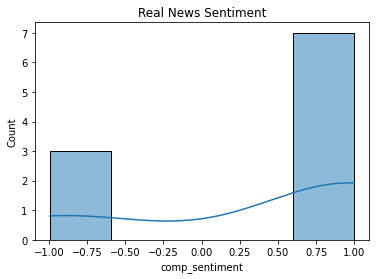

In [ ]:
sns.histplot(manual_dataset[manual_dataset['Real/ Fake'] == 'Real']['comp_sentiment'], kde=True)
plt.title('Real News Sentiment')

Text(0.5, 1.0, 'Fake News Sentiment')

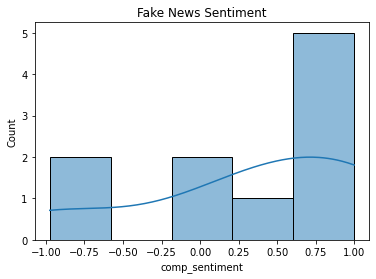

In [ ]:
sns.histplot(manual_dataset[manual_dataset['Real/ Fake'] == 'Fake']['comp_sentiment'], kde=True)
plt.title('Fake News Sentiment')

### Most Common Word Comparison - Real vs Fake

In [ ]:
manual_dataset['most_common_word'] = manual_dataset['Text_Tokens'].apply(lambda x: Counter(x).most_common(1)[0][0])

In [ ]:
manual_dataset[manual_dataset['Real/ Fake'] == 'Real']['most_common_word'].value_counts().head(10)

said       3
alberta    2
first      1
health     1
nickel     1
fire       1
fuel       1
Name: most_common_word, dtype: int64

In [ ]:
manual_dataset[manual_dataset['Real/ Fake'] == 'Fake']['most_common_word'].value_counts().head(10)

climate     2
ice         1
breath      1
moore       1
sinai       1
sun         1
greening    1
solar       1
wind        1
Name: most_common_word, dtype: int64

### Most Common Part of Speech Comparison - Real vs Fake

In [ ]:
nlp = spacy.load('en_core_web_sm') 

In [ ]:
def get_pos_count(tokenized_text, pos):
    if len(tokenized_text) == 0:
        return []
    else:
        doc = nlp(' '.join(tokenized_text))
        pos_l = [token.pos_ for token in doc]
        return Counter(pos_l)[pos]/ len(tokenized_text)

In [ ]:
manual_dataset['noun_count'] = manual_dataset['Text_Tokens'].apply(lambda x: get_pos_count(x, 'NOUN'))
manual_dataset['verb_count'] = manual_dataset['Text_Tokens'].apply(lambda x: get_pos_count(x, 'VERB'))
manual_dataset['adj_count'] = manual_dataset['Text_Tokens'].apply(lambda x: get_pos_count(x, 'ADJ'))


In [ ]:
manual_dataset.groupby('Real/ Fake')['noun_count'].mean()

Real/ Fake
Fake    0.419973
Real    0.438899
Name: noun_count, dtype: float64

In [ ]:
manual_dataset.groupby('Real/ Fake')['verb_count'].mean()

Real/ Fake
Fake    0.192932
Real    0.209309
Name: verb_count, dtype: float64

In [ ]:
manual_dataset.groupby('Real/ Fake')['adj_count'].mean()

Real/ Fake
Fake    0.148000
Real    0.120882
Name: adj_count, dtype: float64